In [2]:
import sys
import utils
import torch.fx as fx
import utils
sys.path.append('../')

# WDL

In [3]:
from wd import WideAndDeepModel 

In [4]:
wdl_model = WideAndDeepModel([100,100,100],8,[400,400,400],0.1)

In [4]:
traced = fx.symbolic_trace(wdl_model)

In [5]:
print(traced.code)




def forward(self, x):
    embedding_offsets = self.embedding.offsets
    add = x + embedding_offsets;  embedding_offsets = None
    embedding_embedding = self.embedding.embedding(add);  add = None
    linear_offsets = self.linear.offsets
    add_1 = x + linear_offsets;  x = linear_offsets = None
    linear_fc = self.linear.fc(add_1);  add_1 = None
    sum_1 = torch.sum(linear_fc, dim = 1);  linear_fc = None
    linear_bias = self.linear.bias
    add_2 = sum_1 + linear_bias;  sum_1 = linear_bias = None
    view = embedding_embedding.view(-1, 24);  embedding_embedding = None
    mlp_mlp_0 = getattr(self.mlp.mlp, "0")(view);  view = None
    mlp_mlp_1 = getattr(self.mlp.mlp, "1")(mlp_mlp_0);  mlp_mlp_0 = None
    mlp_mlp_2 = getattr(self.mlp.mlp, "2")(mlp_mlp_1);  mlp_mlp_1 = None
    mlp_mlp_3 = getattr(self.mlp.mlp, "3")(mlp_mlp_2);  mlp_mlp_2 = None
    mlp_mlp_4 = getattr(self.mlp.mlp, "4")(mlp_mlp_3);  mlp_mlp_3 = None
    mlp_mlp_5 = getattr(self.mlp.mlp, "5")(mlp_mlp_4);  mlp_ml

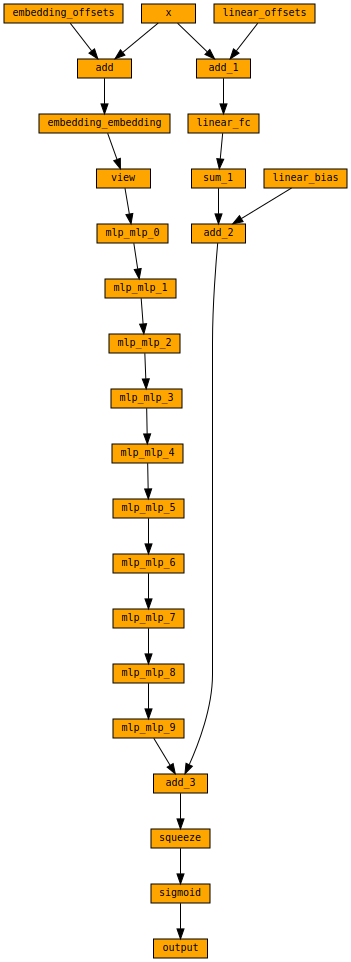

In [8]:
utils.draw(traced.graph)

In [6]:
traced.graph.print_tabular()

opcode         name                 target                                                      args                           kwargs
-------------  -------------------  ----------------------------------------------------------  -----------------------------  ----------
placeholder    x                    x                                                           ()                             {}
get_attr       embedding_offsets    embedding.offsets                                           ()                             {}
call_function  add                  <built-in function add>                                     (x, embedding_offsets)         {}
call_module    embedding_embedding  embedding.embedding                                         (add,)                         {}
get_attr       linear_offsets       linear.offsets                                              ()                             {}
call_function  add_1                <built-in function add>                   

In [5]:
utils.print_tabular(wdl_model)

opcode         name                 target                                                      true_method                                  args                           kwargs
-------------  -------------------  ----------------------------------------------------------  -------------------------------------------  -----------------------------  ----------
placeholder    x                    x                                                                                                        ()                             {}
get_attr       embedding_offsets    embedding.offsets                                                                                        ()                             {}
call_function  add                  <built-in function add>                                                                                  (x, embedding_offsets)         {}
call_module    embedding_embedding  embedding.embedding                                         <class 'torch.nn.

# PNN

In [9]:
from pnn import ProductNeuralNetworkModel

In [7]:
pnn_model = ProductNeuralNetworkModel([100,100,100],8,[400,400,400],0.1)

In [ ]:
traced = fx.symbolic_trace(pnn_model)

In [5]:
print(traced.code)




def forward(self, x):
    embedding_offsets = self.embedding.offsets
    add = x + embedding_offsets;  x = embedding_offsets = None
    embedding_embedding = self.embedding.embedding(add);  add = None
    transpose = embedding_embedding.transpose(1, 2)
    bmm = torch.bmm(embedding_embedding, transpose);  transpose = None
    pn_triu_mask = self.pn.triu_mask
    masked_select = torch.masked_select(bmm, pn_triu_mask);  bmm = pn_triu_mask = None
    view = masked_select.view(-1, 3);  masked_select = None
    view_1 = embedding_embedding.view(-1, 24);  embedding_embedding = None
    cat = torch.cat([view_1, view], dim = 1);  view_1 = view = None
    mlp_mlp_0 = getattr(self.mlp.mlp, "0")(cat);  cat = None
    mlp_mlp_1 = getattr(self.mlp.mlp, "1")(mlp_mlp_0);  mlp_mlp_0 = None
    mlp_mlp_2 = getattr(self.mlp.mlp, "2")(mlp_mlp_1);  mlp_mlp_1 = None
    mlp_mlp_3 = getattr(self.mlp.mlp, "3")(mlp_mlp_2);  mlp_mlp_2 = None
    mlp_mlp_4 = getattr(self.mlp.mlp, "4")(mlp_mlp_3);  mlp_mlp_3 

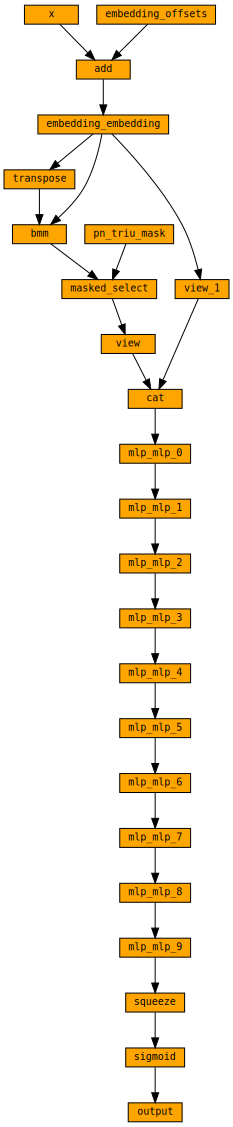

In [6]:
utils.draw(traced.graph)

In [8]:
utils.print_tabular(pnn_model)

opcode         name                 target                                                      true_method                                  args                                                         kwargs
-------------  -------------------  ----------------------------------------------------------  -------------------------------------------  -----------------------------------------------------------  ----------
placeholder    x                    x                                                                                                        ()                                                           {}
get_attr       embedding_offsets    embedding.offsets                                                                                        ()                                                           {}
call_function  add                  <built-in function add>                                                                                  (x, embedding_offsets)     

# PNN Loop

In [8]:
pnn_model = ProductNeuralNetworkModel([100 for _ in range(10)],8,[400,400,400],0.1)

In [9]:
traced = fx.symbolic_trace(pnn_model)

In [10]:
print(traced.code)




def forward(self, x):
    embedding_offsets = self.embedding.offsets
    add = x + embedding_offsets;  x = embedding_offsets = None
    embedding_embedding = self.embedding.embedding(add);  add = None
    getitem = embedding_embedding[(slice(None, None, None), [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8])]
    getitem_1 = embedding_embedding[(slice(None, None, None), [1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6, 7, 8, 9, 3, 4, 5, 6, 7, 8, 9, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 6, 7, 8, 9, 7, 8, 9, 8, 9, 9])]
    mul = getitem * getitem_1;  getitem = getitem_1 = None
    sum_1 = torch.sum(mul, dim = 2);  mul = None
    view = embedding_embedding.view(-1, 80);  embedding_embedding = None
    cat = torch.cat([view, sum_1], dim = 1);  view = sum_1 = None
    mlp_mlp_0 = getattr(self.mlp.mlp, "0")(cat);  cat = None
    mlp_mlp_1 = getattr(self.mlp.mlp, "1")(mlp_mlp_0);  mlp_mlp_0 = None
    mlp_mlp_2 = g

# DFM

In [7]:
from dfm import DeepFactorizationMachineModel

In [8]:
dfm_model = DeepFactorizationMachineModel([100,100,100],8,[400,400,400],0.1)

In [9]:
traced = fx.symbolic_trace(dfm_model)

In [10]:
print(traced.code)




def forward(self, x):
    embedding_offsets = self.embedding.offsets
    add = x + embedding_offsets;  embedding_offsets = None
    embedding_embedding = self.embedding.embedding(add);  add = None
    linear_offsets = self.linear.offsets
    add_1 = x + linear_offsets;  x = linear_offsets = None
    linear_fc = self.linear.fc(add_1);  add_1 = None
    sum_1 = torch.sum(linear_fc, dim = 1);  linear_fc = None
    linear_bias = self.linear.bias
    add_2 = sum_1 + linear_bias;  sum_1 = linear_bias = None
    sum_2 = torch.sum(embedding_embedding, dim = 1)
    pow_1 = sum_2 ** 2;  sum_2 = None
    pow_2 = embedding_embedding ** 2
    sum_3 = torch.sum(pow_2, dim = 1);  pow_2 = None
    sub = pow_1 - sum_3;  pow_1 = sum_3 = None
    sum_4 = torch.sum(sub, dim = 1, keepdim = True);  sub = None
    mul = 0.5 * sum_4;  sum_4 = None
    add_3 = add_2 + mul;  add_2 = mul = None
    view = embedding_embedding.view(-1, 24);  embedding_embedding = None
    mlp_mlp_0 = getattr(self.mlp.mlp, "0")(

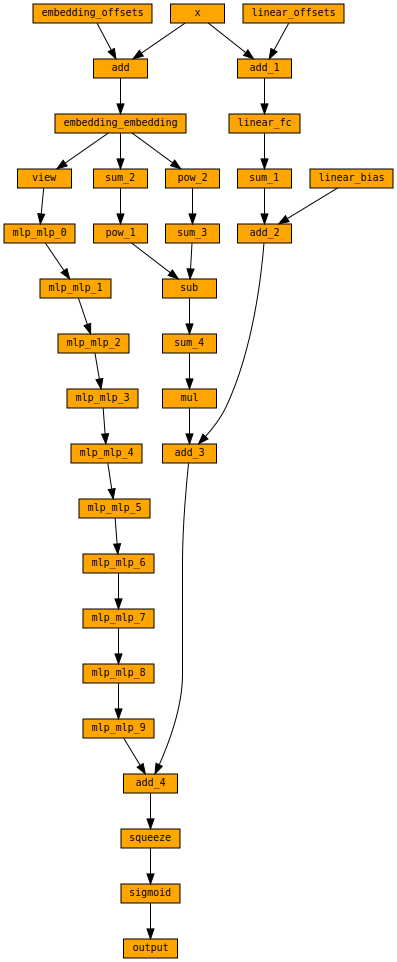

In [11]:
utils.draw(traced.graph)

# NFM

In [12]:
from nfm import NeuralFactorizationMachineModel

In [14]:
nfm_model = NeuralFactorizationMachineModel([100,100,100],8,[400,400,400],[0.1,0.1])

In [15]:
traced = fx.symbolic_trace(nfm_model)

In [16]:
print(traced.code)




def forward(self, x):
    embedding_offsets = self.embedding.offsets
    add = x + embedding_offsets;  embedding_offsets = None
    embedding_embedding = self.embedding.embedding(add);  add = None
    sum_1 = torch.sum(embedding_embedding, dim = 1)
    pow_1 = sum_1 ** 2;  sum_1 = None
    pow_2 = embedding_embedding ** 2;  embedding_embedding = None
    sum_2 = torch.sum(pow_2, dim = 1);  pow_2 = None
    sub = pow_1 - sum_2;  pow_1 = sum_2 = None
    mul = 0.5 * sub;  sub = None
    linear_offsets = self.linear.offsets
    add_1 = x + linear_offsets;  x = linear_offsets = None
    linear_fc = self.linear.fc(add_1);  add_1 = None
    sum_3 = torch.sum(linear_fc, dim = 1);  linear_fc = None
    linear_bias = self.linear.bias
    add_2 = sum_3 + linear_bias;  sum_3 = linear_bias = None
    mlp_mlp_0 = getattr(self.mlp.mlp, "0")(mul);  mul = None
    mlp_mlp_1 = getattr(self.mlp.mlp, "1")(mlp_mlp_0);  mlp_mlp_0 = None
    mlp_mlp_2 = getattr(self.mlp.mlp, "2")(mlp_mlp_1);  mlp_mlp_1 =

In [17]:
traced.graph.print_tabular()

opcode         name                 target                                                      args                      kwargs
-------------  -------------------  ----------------------------------------------------------  ------------------------  ----------
placeholder    x                    x                                                           ()                        {}
get_attr       embedding_offsets    embedding.offsets                                           ()                        {}
call_function  add                  <built-in function add>                                     (x, embedding_offsets)    {}
call_module    embedding_embedding  embedding.embedding                                         (add,)                    {}
call_function  sum_1                <built-in method sum of type object at 0x7fb499452760>      (embedding_embedding,)    {'dim': 1}
call_function  pow_1                <built-in function pow>                                     (sum_1, 2

# FNN

In [11]:
from fnn import FactorizationSupportedNeuralNetworkModel

In [12]:
fnn_model = FactorizationSupportedNeuralNetworkModel([100,100,100],8,[400,400,400],0.1)

In [13]:
traced = fx.symbolic_trace(fnn_model)

In [14]:
print(traced.code)




def forward(self, x):
    embedding_offsets = self.embedding.offsets
    add = x + embedding_offsets;  x = embedding_offsets = None
    embedding_embedding = self.embedding.embedding(add);  add = None
    view = embedding_embedding.view(-1, 24);  embedding_embedding = None
    mlp_mlp_0 = getattr(self.mlp.mlp, "0")(view);  view = None
    mlp_mlp_1 = getattr(self.mlp.mlp, "1")(mlp_mlp_0);  mlp_mlp_0 = None
    mlp_mlp_2 = getattr(self.mlp.mlp, "2")(mlp_mlp_1);  mlp_mlp_1 = None
    mlp_mlp_3 = getattr(self.mlp.mlp, "3")(mlp_mlp_2);  mlp_mlp_2 = None
    mlp_mlp_4 = getattr(self.mlp.mlp, "4")(mlp_mlp_3);  mlp_mlp_3 = None
    mlp_mlp_5 = getattr(self.mlp.mlp, "5")(mlp_mlp_4);  mlp_mlp_4 = None
    mlp_mlp_6 = getattr(self.mlp.mlp, "6")(mlp_mlp_5);  mlp_mlp_5 = None
    mlp_mlp_7 = getattr(self.mlp.mlp, "7")(mlp_mlp_6);  mlp_mlp_6 = None
    mlp_mlp_8 = getattr(self.mlp.mlp, "8")(mlp_mlp_7);  mlp_mlp_7 = None
    mlp_mlp_9 = getattr(self.mlp.mlp, "9")(mlp_mlp_8);  mlp_mlp_8 = None
   

# FNFM

In [2]:
from fnfm import FieldAwareNeuralFactorizationMachineModel

In [4]:
fnfm_model = FieldAwareNeuralFactorizationMachineModel([100,100,100],8,[400,400,400],[0.1,0.1])

In [5]:
traced = fx.symbolic_trace(fnfm_model)

In [6]:
print(traced.code)




def forward(self, x):
    ffm_offsets = self.ffm.offsets
    add = x + ffm_offsets;  ffm_offsets = None
    ffm_embeddings_0 = getattr(self.ffm.embeddings, "0")(add)
    ffm_embeddings_1 = getattr(self.ffm.embeddings, "1")(add)
    ffm_embeddings_2 = getattr(self.ffm.embeddings, "2")(add);  add = None
    getitem = ffm_embeddings_1[(slice(None, None, None), 0)]
    getitem_1 = ffm_embeddings_0[(slice(None, None, None), 1)]
    mul = getitem * getitem_1;  getitem = getitem_1 = None
    getitem_2 = ffm_embeddings_2[(slice(None, None, None), 0)]
    getitem_3 = ffm_embeddings_0[(slice(None, None, None), 2)];  ffm_embeddings_0 = None
    mul_1 = getitem_2 * getitem_3;  getitem_2 = getitem_3 = None
    getitem_4 = ffm_embeddings_2[(slice(None, None, None), 1)];  ffm_embeddings_2 = None
    getitem_5 = ffm_embeddings_1[(slice(None, None, None), 2)];  ffm_embeddings_1 = None
    mul_2 = getitem_4 * getitem_5;  getitem_4 = getitem_5 = None
    stack = torch.stack([mul, mul_1, mul_2], dim = 

# FFM

In [7]:
from ffm import FieldAwareFactorizationMachineModel

In [8]:
ffm_model = FieldAwareFactorizationMachineModel([100,100,100],8)

In [9]:
traced = fx.symbolic_trace(ffm_model)

In [10]:
print(traced.code)




def forward(self, x):
    ffm_offsets = self.ffm.offsets
    add = x + ffm_offsets;  ffm_offsets = None
    ffm_embeddings_0 = getattr(self.ffm.embeddings, "0")(add)
    ffm_embeddings_1 = getattr(self.ffm.embeddings, "1")(add)
    ffm_embeddings_2 = getattr(self.ffm.embeddings, "2")(add);  add = None
    getitem = ffm_embeddings_1[(slice(None, None, None), 0)]
    getitem_1 = ffm_embeddings_0[(slice(None, None, None), 1)]
    mul = getitem * getitem_1;  getitem = getitem_1 = None
    getitem_2 = ffm_embeddings_2[(slice(None, None, None), 0)]
    getitem_3 = ffm_embeddings_0[(slice(None, None, None), 2)];  ffm_embeddings_0 = None
    mul_1 = getitem_2 * getitem_3;  getitem_2 = getitem_3 = None
    getitem_4 = ffm_embeddings_2[(slice(None, None, None), 1)];  ffm_embeddings_2 = None
    getitem_5 = ffm_embeddings_1[(slice(None, None, None), 2)];  ffm_embeddings_1 = None
    mul_2 = getitem_4 * getitem_5;  getitem_4 = getitem_5 = None
    stack = torch.stack([mul, mul_1, mul_2], dim = 

# DCN

In [17]:
from dcn import DeepCrossNetworkModel

In [18]:
dcn_model = DeepCrossNetworkModel([100,100,100],8,4,[400,400,400],0.1)

In [19]:
traced = fx.symbolic_trace(dcn_model)

In [20]:
print(traced.code)




def forward(self, x):
    embedding_offsets = self.embedding.offsets
    add = x + embedding_offsets;  x = embedding_offsets = None
    embedding_embedding = self.embedding.embedding(add);  add = None
    view = embedding_embedding.view(-1, 24);  embedding_embedding = None
    cn_w_0 = getattr(self.cn.w, "0")(view)
    mul = view * cn_w_0;  cn_w_0 = None
    cn_b_0 = getattr(self.cn.b, "0")
    add_1 = mul + cn_b_0;  mul = cn_b_0 = None
    add_2 = add_1 + view;  add_1 = None
    cn_w_1 = getattr(self.cn.w, "1")(add_2)
    mul_1 = view * cn_w_1;  cn_w_1 = None
    cn_b_1 = getattr(self.cn.b, "1")
    add_3 = mul_1 + cn_b_1;  mul_1 = cn_b_1 = None
    add_4 = add_3 + add_2;  add_3 = add_2 = None
    cn_w_2 = getattr(self.cn.w, "2")(add_4)
    mul_2 = view * cn_w_2;  cn_w_2 = None
    cn_b_2 = getattr(self.cn.b, "2")
    add_5 = mul_2 + cn_b_2;  mul_2 = cn_b_2 = None
    add_6 = add_5 + add_4;  add_5 = add_4 = None
    cn_w_3 = getattr(self.cn.w, "3")(add_6)
    mul_3 = view * cn_w_3;

In [21]:
traced.graph.print_tabular()

opcode         name                 target                                                      args                           kwargs
-------------  -------------------  ----------------------------------------------------------  -----------------------------  ----------
placeholder    x                    x                                                           ()                             {}
get_attr       embedding_offsets    embedding.offsets                                           ()                             {}
call_function  add                  <built-in function add>                                     (x, embedding_offsets)         {}
call_module    embedding_embedding  embedding.embedding                                         (add,)                         {}
call_method    view                 view                                                        (embedding_embedding, -1, 24)  {}
call_module    cn_w_0               cn.w.0                                    

In [22]:
target_model = utils.get_target_mod(dcn_model,"cn.w.0")

In [23]:
type(target_model)

torch.nn.modules.linear.Linear

# AFM

In [2]:
from afm import AttentionalFactorizationMachineModel

In [6]:
afm_model = AttentionalFactorizationMachineModel([100,100,100],8,32,[0.1,0.1])

In [8]:
traced = fx.symbolic_trace(afm_model)

In [9]:
print(traced.code)




def forward(self, x):
    linear_offsets = self.linear.offsets
    add = x + linear_offsets;  linear_offsets = None
    linear_fc = self.linear.fc(add);  add = None
    sum_1 = torch.sum(linear_fc, dim = 1);  linear_fc = None
    linear_bias = self.linear.bias
    add_1 = sum_1 + linear_bias;  sum_1 = linear_bias = None
    embedding_offsets = self.embedding.offsets
    add_2 = x + embedding_offsets;  x = embedding_offsets = None
    embedding_embedding = self.embedding.embedding(add_2);  add_2 = None
    getitem = embedding_embedding[(slice(None, None, None), [0, 0, 1])]
    getitem_1 = embedding_embedding[(slice(None, None, None), [1, 2, 2])];  embedding_embedding = None
    mul = getitem * getitem_1;  getitem = getitem_1 = None
    afm_attention = self.afm.attention(mul)
    relu = torch.nn.functional.relu(afm_attention, inplace = False);  afm_attention = None
    afm_projection = self.afm.projection(relu);  relu = None
    softmax = torch.nn.functional.softmax(afm_projection, di

In [10]:
traced.graph.print_tabular()

opcode         name                 target                                                      args                                                         kwargs
-------------  -------------------  ----------------------------------------------------------  -----------------------------------------------------------  ----------------------------------------------
placeholder    x                    x                                                           ()                                                           {}
get_attr       linear_offsets       linear.offsets                                              ()                                                           {}
call_function  add                  <built-in function add>                                     (x, linear_offsets)                                          {}
call_module    linear_fc            linear.fc                                                   (add,)                                                  

In [12]:
target_model = utils.get_target_mod(afm_model,"afm.attention")

In [13]:
type(target_model)

torch.nn.modules.linear.Linear

In [14]:
embed_model = utils.get_target_mod(afm_model,"embedding.embedding")

In [26]:
s = str(type(embed_model))

In [28]:
s

"<class 'torch.nn.modules.sparse.Embedding'>"